<a href="https://colab.research.google.com/github/soumilhooda/MLDLNNtoCV/blob/main/LinearRegression_GDTypesWOLambda_NNFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import numpy.random as nr

In [3]:
def cost_function(X,y,w):
  hypothesis = np.dot(X,w.T)
  J = 1/(2*len(y))*np.sum((hypothesis-y)**2)
  return J

In [4]:
def batch_gd(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = w - alpha/len(y)*np.dot(hypothesis-y,X)
    cost_history[i] = cost_function(X,y,w)
  return w, cost_history


In [16]:
def MB_gd(X,y,w,alpha,iters,bath_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - alpha/batch_size * (ind_x.T.dot(ind_x.dot(w)-ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [21]:
def S_gd(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha * (ind_x.T.dot(ind_x.dot(w)-ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history


In [7]:
data = pd.read_excel('/content/drive/MyDrive/data_NNFL1stTut.xlsx',header=None)
print(data)

       0        1       2
0    2.6  1360.00  13.600
1    2.0  1292.25  13.300
2    2.2  1402.00  11.900
3    2.2  1375.50  11.000
4    1.6  1272.25  11.150
..   ...      ...     ...
344  0.7   902.00   9.100
345  0.7   921.25   9.475
346  0.5   858.25   9.325
347  0.5   878.00   9.900
348  0.6   892.50   7.550

[349 rows x 3 columns]


In [8]:
datan = data.values
X = datan[:,[0,1]]
m = X.shape[0] #0 is column, 1 is row
xmin = np.min(X, axis=0)
xmax = np.max(X, axis=0)
X = ((X - xmin)/(xmax - xmin))
print(X)

[[0.9735704  0.43764219]
 [0.97068717 0.38159255]
 [0.97164825 0.47238883]
 [0.97164825 0.45046536]
 [0.96876502 0.36504654]
 [0.96684286 0.30279214]
 [0.96684286 0.29286453]
 [0.96588179 0.25253361]
 [0.96540125 0.21758014]
 [0.96395963 0.14788004]
 [0.         0.14891417]
 [0.96444017 0.19441572]
 [0.96444017 0.18262668]
 [0.96636233 0.25894519]
 [0.97068717 0.41551189]
 [0.97164825 0.43019648]
 [0.96924556 0.3327818 ]
 [0.96828448 0.2876939 ]
 [0.96876502 0.33505688]
 [0.97020663 0.37600827]
 [0.97501201 0.4467425 ]
 [0.97164825 0.39627715]
 [0.97164825 0.3811789 ]
 [0.97501201 0.45667011]
 [0.98414224 0.62026887]
 [0.99423354 0.78138573]
 [0.99038924 0.66928645]
 [0.9798174  0.39855222]
 [0.96828448 0.11044467]
 [0.96588179 0.06763185]
 [0.96924556 0.20620476]
 [0.97020663 0.17600827]
 [0.96780394 0.12967942]
 [0.96492071 0.04777663]
 [0.         0.        ]
 [0.96395963 0.01344364]
 [0.96492071 0.07942089]
 [0.96780394 0.21468459]
 [0.98222009 0.6254395 ]
 [0.         0.59027921]


In [9]:
pp = np.ones([m,1])
X = np.append(pp,X,axis=1)
print(X)

[[1.         0.9735704  0.43764219]
 [1.         0.97068717 0.38159255]
 [1.         0.97164825 0.47238883]
 ...
 [1.         0.9634791  0.02254395]
 [1.         0.9634791  0.03888314]
 [1.         0.96395963 0.05087901]]


In [10]:
y = datan[:,2]
ymin = np.min(y, axis=0)
ymax = np.max(y, axis=0)
y = ((y - ymin)/(ymax - ymin))

In [11]:
w = np.zeros(X.shape[1])
print(w)

[0. 0. 0.]


Let us try out Batch Gradient Descent first.

In [12]:
alpha = 0.05
iters = 100
batch_w, J_his = batch_gd(X,y,w,alpha,iters)

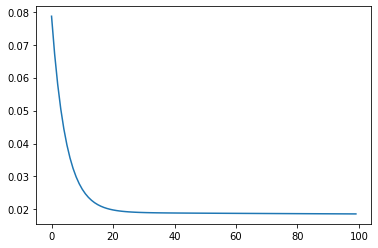

In [13]:
plt.plot(range(iters),J_his)
plt.show()

In [14]:
print(batch_w)

[0.18179998 0.16724029 0.11937219]


Let us try out Mini Batch Gradient now.

In [17]:
alpha = 0.005
iters = 1200
batch_size = 50
mini_batch_w, J_mini_batch = MB_gd(X,y,w,alpha,iters,batch_size)

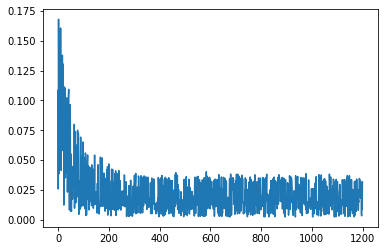

In [18]:
plt.plot(range(iters),J_mini_batch)
plt.show()

In [19]:
print(mini_batch_w)

[0.19908918 0.18313934 0.12702786]


Let us finally try out Stochastic Gradient Descent. I will soon right another piece to test out the 18 regression possibilities using lambda. 

In [22]:
alpha = 0.01
n_epochs = 3000
s_w, J_s = S_gd(X,y,w,alpha,n_epochs)

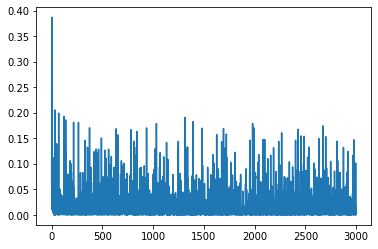

In [24]:
plt.plot(range(n_epochs),J_s)
plt.show()

In [25]:
print(s_w)

[0.18549268 0.16809617 0.31546594]
